<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Practicing K-Means:  Isotopic Composition Plutonium Batches

_Authors: Dave Yerrington (SF)_


---

We have a nice [data dictionary](https://vincentarelbundock.github.io/Rdatasets/doc/cluster/pluton.html).

    Pu238 : the percentages of (238)Pu, always less than 2 percent.

    Pu239 : the percentages of (239)Pu, typically between 60 and 80 percent (from neutron capture of Uranium, (238)U).

    Pu240 : percentage of the plutonium 240 isotope.

    Pu241 : percentage of the plutonium 241 isotope.
    
This data is fairly odd and you will see that K-Means may not be ideal in a certain respect but the takeaway is that it can do an ok job with whispy, elongated shapes.  A more ideal model would be DBSCAN or a hierachical clustering model.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data, color = make_blobs(n_samples=100, random_state=29, centers=3, cluster_std=1.5)

In [17]:
csv_file = "https://vincentarelbundock.github.io/Rdatasets/csv/cluster/pluton.csv"

df = pd.read_csv(csv_file)
df.head()

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241
0,1,0.126,75.804,21.204,2.180
1,2,0.133,75.515,21.408,2.240
2,3,0.127,75.175,21.668,2.305
3,4,0.156,78.872,18.428,1.906
4,5,0.503,73.317,20.223,4.128


###  Use Pu239 and Pu240 as our features.
1. Select only columns "Pu239" and "Pu240" to use for our example.
1. Plot "Pu239" and "Pu240" for visual reference.


In [31]:
df[['Pu239', 'Pu240']].head()

,Pu239,Pu240
0,75.804,21.204
1,75.515,21.408
2,75.175,21.668
3,78.872,18.428
4,73.317,20.223


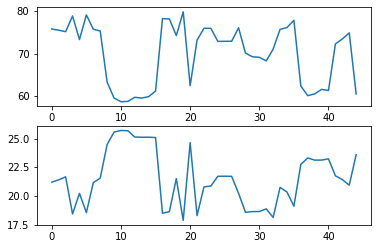

In [19]:
# A:
fig, ax = plt.subplots(2)
ax[0].plot(df['Pu239'])
ax[1].plot(df['Pu240'])

### Next, use K-Means to cluster this data using "Pu239" and "Pu240" features
Initialize an instance of `KMeans` from `sklearn`, initialized for K=3 clusters.  Fit our sliced dataframe with the `fit`.

In [20]:
# A:
X = df[['Pu239', 'Pu240']].copy()

In [21]:
km = KMeans(n_clusters=3, random_state=42)
km.fit(X)

KMeans(n_clusters=3, random_state=42)

### Assign clusters assignments (predictions) back to the original dataframe

In [22]:
# A: 
km.predict(X)

array([2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2,
       0], dtype=int32)

In [23]:
km.labels_

array([2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 2,
       0], dtype=int32)

In [24]:
df['cluster'] = km.labels_

In [25]:
df

,Unnamed: 0,Pu238,Pu239,Pu240,Pu241,cluster
0,1,0.126,75.804,21.204,2.180,2
1,2,0.133,75.515,21.408,2.240,2
2,3,0.127,75.175,21.668,2.305,2
3,4,0.156,78.872,18.428,1.906,2
4,5,0.503,73.317,20.223,4.128,1
5,6,0.113,79.116,18.548,1.690,2
6,7,0.129,75.751,21.162,2.260,2
7,8,0.124,75.326,21.557,2.282,2
8,9,1.022,63.287,24.493,6.990,0
9,10,1.412,59.553,25.576,8.027,0


### Reference the coordinates for the centroids, plot with your "Pu239" and "Pu240" scatter plot
Plot the centroids from the model object with the scatter of "Pu239" and "Pu240".

In [34]:
# A:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["Pu239", "Pu240"]
)

<Figure size 504x504 with 0 Axes>

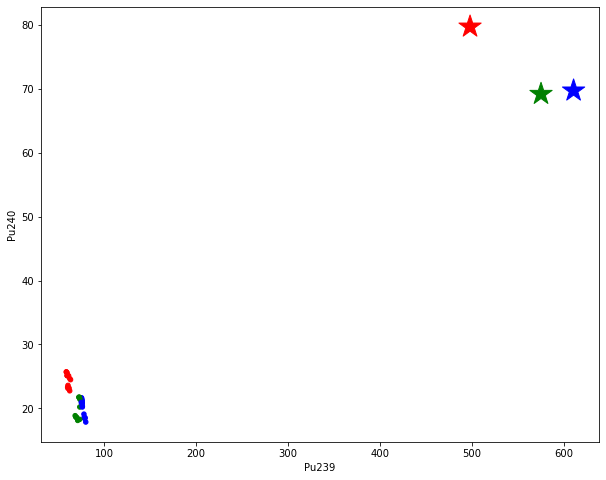

In [35]:
plt.figure(figsize=(7,7));

colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Scale your data, rerun your model, then plot.
This should help slightly but you should compare before and after.

In [37]:
# A:
X = df[['Pu239', 'Pu240']].copy()
sc = StandardScaler()
X_sc = sc.fit_transform(X)

km = KMeans(n_clusters=3, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=3, random_state=42)

In [38]:
df['cluster'] = km.labels_

In [39]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=["Pu239", "Pu240"]
)

<Figure size 504x504 with 0 Axes>

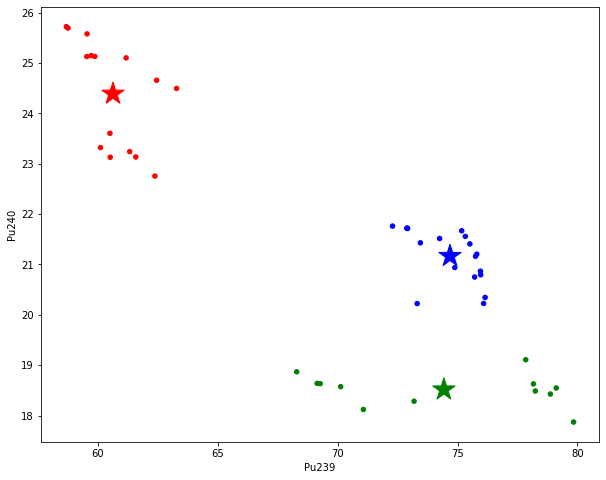

In [40]:
plt.figure(figsize=(7,7));

colors = ["red", "green", "blue"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(    
    kind="scatter", 
    x="Pu239", y="Pu240",
    figsize=(10,8),
    c = df['color']
)

centroids.plot(
    kind="scatter", 
    x="Pu239", y="Pu240", 
    marker="*", c=["r", "g", "b"], s=550,
    ax=ax
);

### Might as well check that silhouette score
Just to confirm what your eyes are telling you.

In [42]:
from sklearn.metrics import silhouette_score
silhouette_score(X_sc, km.labels_)

0.7057009982235609

In [43]:
# A: 
scores = []
for k in range(2, 31):
    km = KMeans(n_clusters=k)
    km.fit(X_sc)
    inertia = km.inertia_
    sil = silhouette_score(X_sc, km.labels_)
    scores.append([k, inertia, sil])
    
score_df = pd.DataFrame(scores)
score_df.columns = ['k', 'inertia', 'silhouette']
score_df.head()

,k,inertia,silhouette
0,2,18.647866,0.705701
1,3,9.743960,0.633217
2,4,5.391655,0.719628
3,5,2.856776,0.686108
4,6,1.986038,0.600530
